# Logistic Regression(Part-2) =>

In [67]:
from sklearn.datasets import make_classification
import numpy as np
X , y = make_classification(n_samples = 100 , n_features = 2 , n_informative = 1 , n_redundant=0 , n_classes = 2, n_clusters_per_class =1 , random_state = 41 , hypercube = False,class_sep =10 ) 

# X , y = make_classification(n_samples = 100 , n_features = 2 , n_informative = 1 , n_redundant=0 , n_classes = 2, n_clusters_per_class =1 , random_state = 41 , hypercube = False,class_sep =20 ) 


### n_samples=100, Generate 100 total data points
### n_features=2, Each data point will have 2 features (i.e., X has shape (100, 2))
### n_informative=1, Only 1 feature actually helps in classifying (i.e., separating class 0 and class 1)
### n_redundant=0, No redundant/correlated features are added
### n_classes=2, Two output classes: 0 and 1
### n_clusters_per_class=1,	Each class will form 1 cluster in the feature space
### random_state=41	, Sets a fixed seed for random number generation — so results are reproducible
### hypercube=False, Do not place clusters inside a hypercube (they are placed linearly)
### class_sep=10, Set a large separation between class clusters (more separable = easier to classify)

In [3]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [5]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [7]:
import matplotlib.pyplot as plt

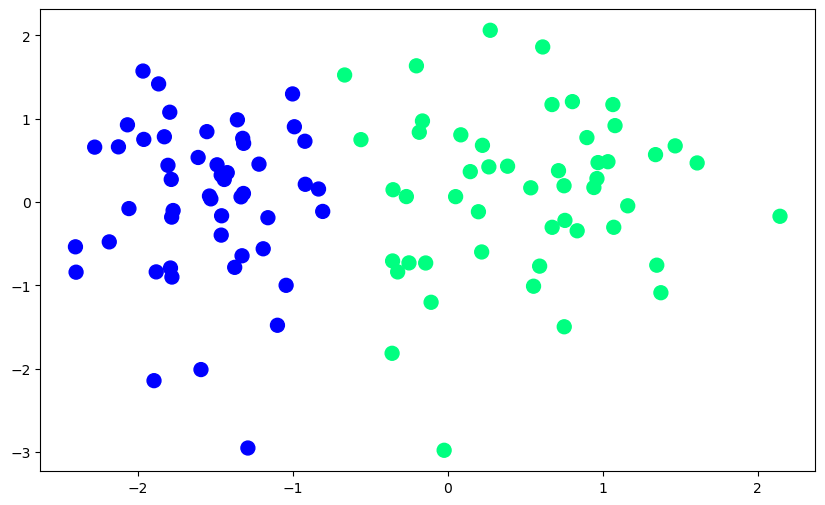

In [55]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1],c = y , cmap='winter' , s = 100)

In [57]:
X = np.insert(X , 0 , 1 ,axis =1)
X

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

In [59]:
print(np.ones(X.shape[1]))
print(X.shape)

[1. 1. 1.]
(100, 3)


In [61]:
def perceptron(X , y):

    X = np.insert(X , 0,1,axis =1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j] , weights))
        # Update the Weights =>
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    return weights[0] , weights[1:]    
    

In [63]:
np.insert(X[41] , 0,1)

array([ 1.        ,  1.        , -0.91783293,  0.21243302])

In [69]:
np.dot(np.insert(X[41] , 0,1), [1,1,1])

0.2946000908036748

In [71]:
def step(z):
    return 1 if z>0 else 0

In [73]:
step(0.294)

1

In [75]:
step(-0.294)

0

In [77]:
intercept_ , coef_ = perceptron(X , y)

In [79]:
print(coef_)
print(intercept_)

[1.28974196 0.05805417]
1.0


In [81]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [83]:
print(m)
print(b)

-22.2161812589606
-17.225291521742577


In [85]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

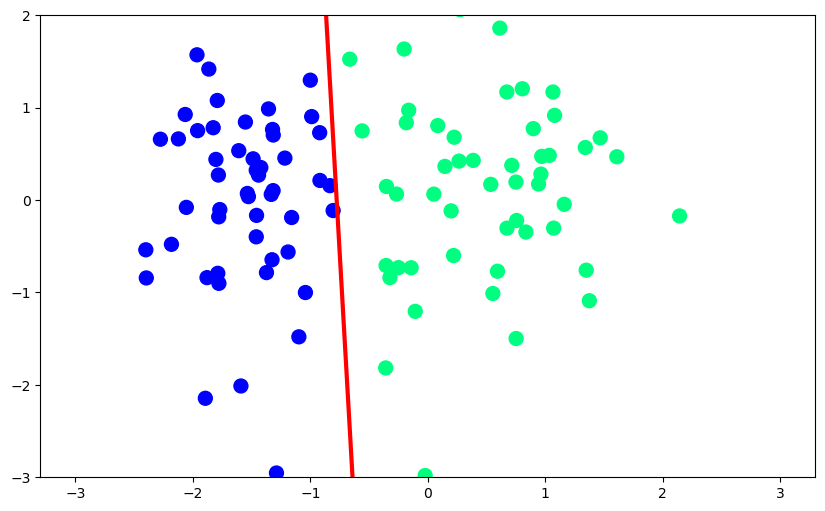

In [87]:
plt.figure(figsize = (10,6))
plt.plot(x_input , y_input , color = 'red', linewidth = 3)
plt.scatter(X[:,0] , X[:,1], c=y , cmap = 'winter' , s =100)
plt.ylim(-3,2)

In [45]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [47]:
m,b = perceptron(X,y)

In [49]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [45]:
# fig, ax = plt.subplots(figsize=(9,5))

# x_i = np.arange(-3, 3, 0.1)
# y_i = x_i*m[0] +b[0]
# ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
# line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
# plt.ylim(-3,3)
# def update(i):
#     label = 'epoch {0}'.format(i + 1)
#     line.set_ydata(x_i*m[i] + b[i])
#     ax.set_xlabel(label)
#     # return line, ax

# anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

## Actual Scikit learn's class => Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [91]:
print(lor.coef_)
print(lor.intercept_)


print(lor.coef_[0])
print(lor.coef_[0][0])

[[3.50144121 0.02773483]]
[2.25106636]
[3.50144121 0.02773483]
3.501441206077956


In [55]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [57]:
print(m)
print(b)

-126.24706352310264
[-81.16386951]


In [59]:
x_input1 = np.linspace(-3 , 3 ,100)
y_input1 = m * x_input + b

In [95]:
plt.figure(figsize = (10,6))
plt.plot(x_input , y_input , color = 'red', linewidth = 3)
plt.plot(x_input1 , y_input1 , color = 'black', linewidth = 3)
plt.scatter(X[:,0] , X[:,1], c=y , cmap = 'winter' , s =100)
plt.show()
plt.ylim(-3,2)

<IPython.core.display.Javascript object>

(-3.0, 2.0)

## Now I will use Sigmoid Function instead of Step Function => 

In [117]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [119]:
def perceptron(X , y):

    X = np.insert(X , 0,1,axis =1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j] , weights))
        # Update the Weights =>
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    return weights[0] , weights[1:]    
    

In [121]:
intercept_ , coef_ = perceptron(X, y)

In [123]:
print(intercept_)
print(coef_)

1.6062340627148652
[ 1.60623406  4.72944473 -0.03008062]


In [125]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [127]:
print(m , b)

-0.3396242376794081 -0.3396242376794081


In [135]:
x_input2 = np.linspace(-3 , 3,100)
y_input2 = m*x_input +b

NameError: name 'x_input1' is not defined

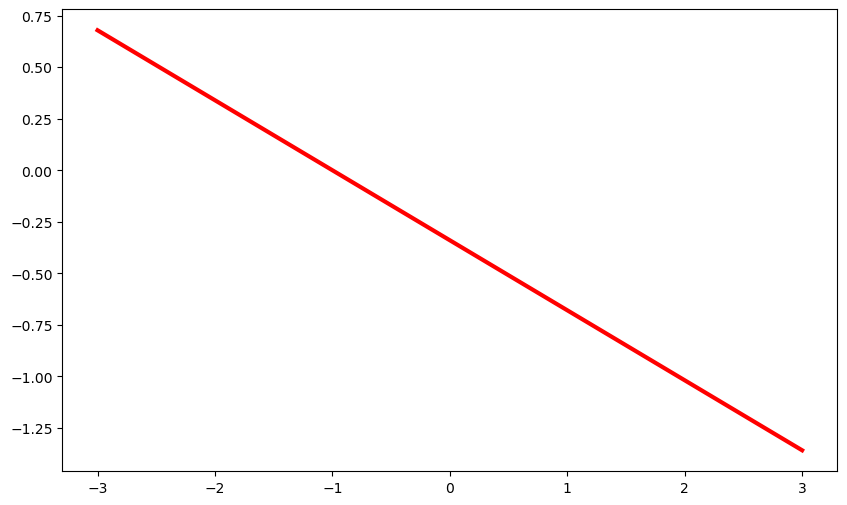

In [137]:
plt.figure(figsize = (10,6))
plt.plot(x_input , y_input , color = 'red', linewidth = 3)
plt.plot(x_input1 , y_input1 , color = 'black', linewidth = 3)
plt.plot(x_input2 , y_input2 , color = 'brown', linewidth = 3)
plt.scatter(X[:,0] , X[:,1], c=y , cmap = 'winter' , s =100)
plt.show()
plt.ylim(-3,2)